# Cohort Welcome Offer

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cx_Oracle

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [4]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
df = pd.read_sql_query('''

 SELECT  
 	em.EM_ID,
 	to_date(em.EM_FECHA_ALTA) AS fecha_alta,
	to_date(min(ec_FECHA)) AS OrderDate,
--    ec.EC_CODIGO_PUBLICO AS OrderId,
    pro.PR_NOMBRE AS Product,
	ecd.ECD_PRECIO AS TotalCharges
from 
EMPLEO_ES.EMPRESAS_COMPRAS ec 
LEFT JOIN empleo_es.empresas_compras_detalles ecd ON ec.ec_id = ecd.ecd_compra
LEFT JOIN empleo_es.empresas_usuarios eu ON ec.EC_EMPRESA = eu.eu_id
LEFT JOIN empleo_Es.empresas_grupos eg ON eu.eu_grupo = eg.eg_id 
LEFT JOIN empleo_es.empresas_matrices em ON eg.eg_matriz = em.em_id
LEFT JOIN empleo_es.productos pro ON ecd.ECD_PRODUCTO = pro.pr_id
LEFT JOIN 
	(
		select num_compra, 
		to_date(fecha_imputacion, 'yyyymmdd') AS fecha_imputacion, 
		cod_canal_venta,
		sum(importe) importe
		from 
		DWHPRO.FACT_ENTERPRISE_SALES s
		LEFT JOIN DWHPRO.DIM_CANAL_VENTA dcv ON dcv.ID_CANAL_VENTA = s.id_canal_venta
		--where fecha_imputacion >= '20190101'
		group by num_compra, fecha_imputacion, cod_canal_venta
		having sum(importe) > 0
    )s ON TO_CHAR(ec.EC_CODIGO_PUBLICO) = s.NUM_COMPRA 
 WHERE 
 	to_date(em.EM_FECHA_ALTA) >= TO_DATE('20180101','YYYYMMDD') 
 	AND 
 	pro.PR_NOMBRE LIKE '%ferta%' 
 	AND ecd.ECD_PRECIO/ecd.ECD_CANTIDAD = 49
 	AND ec.EC_ESTADO = 1
 	AND ecd.ECD_PRECIO > 0
GROUP BY 
 	em.EM_ID,
 	to_date(em.EM_FECHA_ALTA),
  --  ec.EC_CODIGO_PUBLICO,
    pro.PR_NOMBRE,
	ecd.ECD_PRECIO

''', con)
df_save = df
df

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES
0,33004492666,2018-03-08,2018-03-08,Oferta estandar,49
1,34253930842,2018-09-26,2018-09-26,Oferta estandar,49
2,34348734952,2018-10-09,2018-10-10,Oferta estandar,49
3,33502002042,2018-05-24,2018-05-25,Oferta estandar,49
4,34031647924,2018-08-26,2018-08-26,Oferta estandar,49
5,33144436028,2018-03-29,2018-03-29,Oferta estandar,49
6,32929361546,2018-02-26,2018-02-26,Oferta estandar,49
7,34513526922,2018-11-02,2019-02-12,Oferta estandar,49
8,34253850502,2018-09-26,2018-09-26,Oferta estandar,49
9,32964192006,2018-03-02,2018-03-02,Oferta estandar,49


In [6]:
df['CohortGroup'] = df['FECHA_ALTA'].apply(lambda x: x.strftime('%Y-%m'))

In [8]:
df['OrderPeriod'] = df['ORDERDATE']

In [9]:
df

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES,CohortGroup,OrderPeriod
0,33004492666,2018-03-08,2018-03-08,Oferta estandar,49,2018-03,2018-03-08
1,34253930842,2018-09-26,2018-09-26,Oferta estandar,49,2018-09,2018-09-26
2,34348734952,2018-10-09,2018-10-10,Oferta estandar,49,2018-10,2018-10-10
3,33502002042,2018-05-24,2018-05-25,Oferta estandar,49,2018-05,2018-05-25
4,34031647924,2018-08-26,2018-08-26,Oferta estandar,49,2018-08,2018-08-26
5,33144436028,2018-03-29,2018-03-29,Oferta estandar,49,2018-03,2018-03-29
6,32929361546,2018-02-26,2018-02-26,Oferta estandar,49,2018-02,2018-02-26
7,34513526922,2018-11-02,2019-02-12,Oferta estandar,49,2018-11,2019-02-12
8,34253850502,2018-09-26,2018-09-26,Oferta estandar,49,2018-09,2018-09-26
9,32964192006,2018-03-02,2018-03-02,Oferta estandar,49,2018-03,2018-03-02


In [10]:

grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'EM_ID': pd.Series.nunique,
                       'PRODUCT': pd.Series.count,
                       'TOTALCHARGES': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'EM_ID': 'TotalUsers',
                        'PRODUCT': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalOrders  TOTALCHARGES
CohortGroup OrderPeriod                                       
2018-01     2018-01-02            4            4           196
            2018-01-03            5            5           245
            2018-01-04            8            8           392
            2018-01-05            2            2            98
            2018-01-08            4            4           196

In [11]:
cohorts

TotalUsers  TotalOrders  TOTALCHARGES
CohortGroup OrderPeriod                                       
2018-01     2018-01-02            4            4           196
            2018-01-03            5            5           245
            2018-01-04            8            8           392
            2018-01-05            2            2            98
            2018-01-08            4            4           196
            2018-01-09            3            3           147
            2018-01-11            2            2            98
            2018-01-12            2            2            98
            2018-01-15            7            7           343
            2018-01-16            7            7           343
            2018-01-17            4            4           196
            2018-01-18            3            3           147
            2018-01-19            4            4           196
            2018-01-22            8            8           392
            2018-01-23            7            7           343
            2018-01-24            3            3           147
            2018-05-29            1            1            49
            2018-05-30            2            2            98
            2018-06-11            1            1            49
            2018-06-14            1            1            49
            2018-06-27            2            2            98
            2018-06-28            1            1            49
            2018-06-29            1            1            49
            2018-07-02            1            1            49
            2018-07-04            1            1            49
            2018-07-05            1            1            49
            2018-07-06            2            2            98
            2018-07-09            2            2            98
            2018-07-12            2            2            98
            2018-07-13            1            1            49
...                             ...          ...           ...
2019-03     2019-03-20           87           87          4263
            2019-03-21           77           77          3773
            2019-03-22           71           71          3479
            2019-03-23            4            4           196
            2019-03-24           11           11           539
            2019-03-25           99           99          4851
            2019-03-26           82           82          4018
            2019-03-27           68           68          3332
            2019-03-28           72           72          3528
            2019-03-29           51           51          2499
            2019-03-30           14           14           686
            2019-03-31            7            7           343
            2019-04-01           34           34          1666
            2019-04-02           15           15           735
            2019-04-03            8            8           392
            2019-04-04            5            5           245
            2019-04-05            5            5           245
            2019-04-06            2            2            98
            2019-04-07            1            1            49
            2019-04-08            7            7           343
            2019-04-09            6            6           294
2019-04     2019-04-01           48           48          2352
            2019-04-02           82           82          4018
            2019-04-03           59           59          2891
            2019-04-04           70           70          3430
            2019-04-05           51           51          2499
            2019-04-06            9            9           441
            2019-04-07            6            6           294
            2019-04-08           79           79          3871
            2019-04-09           55           55          2695

[1663 rows x 3 columns]

In [12]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TotalOrders  TOTALCHARGES  CohortPeriod
CohortGroup OrderPeriod                                                     
2018-01     2018-01-02            4            4           196             1
            2018-01-03            5            5           245             2
            2018-01-04            8            8           392             3
            2018-01-05            2            2            98             4
            2018-01-08            4            4           196             5

In [13]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2018-01     4
2018-02    20
2018-03    13
2018-04     7
2018-05    38
Name: TotalUsers, dtype: int64

In [14]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2018-01      1               4
             2               5
             3               8
             4               2
             5               4
Name: TotalUsers, dtype: int64

In [15]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
CohortPeriod,,,,,,,,,,,,,,,,
1,4.0,20.0,13.0,7.0,38.0,22.0,26.0,28.0,9.0,45.0,8.0,11.0,2.0,35.0,30.0,48.0
2,5.0,27.0,20.0,22.0,50.0,65.0,38.0,36.0,8.0,61.0,34.0,7.0,42.0,4.0,6.0,82.0
3,8.0,22.0,26.0,21.0,42.0,62.0,60.0,29.0,71.0,74.0,6.0,60.0,54.0,7.0,5.0,59.0
4,2.0,15.0,42.0,37.0,2.0,62.0,48.0,8.0,67.0,71.0,6.0,59.0,35.0,74.0,63.0,70.0
5,4.0,3.0,31.0,21.0,92.0,50.0,38.0,6.0,64.0,41.0,64.0,41.0,5.0,65.0,80.0,51.0


In [24]:
user_retention = cohorts['TotalUsers'].unstack(0)

In [16]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04
CohortPeriod,,,,,,,,,,,,,,,,
1,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.0,1.000000,1.000000,1.000000
2,1.25,1.35,1.538462,3.142857,1.315789,2.954545,1.461538,1.285714,0.888889,1.355556,4.250,0.636364,21.0,0.114286,0.200000,1.708333
3,2.00,1.10,2.000000,3.000000,1.105263,2.818182,2.307692,1.035714,7.888889,1.644444,0.750,5.454545,27.0,0.200000,0.166667,1.229167
4,0.50,0.75,3.230769,5.285714,0.052632,2.818182,1.846154,0.285714,7.444444,1.577778,0.750,5.363636,17.5,2.114286,2.100000,1.458333
5,1.00,0.15,2.384615,3.000000,2.421053,2.272727,1.461538,0.214286,7.111111,0.911111,8.000,3.727273,2.5,1.857143,2.666667,1.062500
6,0.75,0.05,2.923077,5.000000,1.815789,2.409091,0.461538,1.250000,7.777778,0.266667,6.750,0.636364,2.5,2.457143,2.666667,0.187500
7,0.50,0.20,1.461538,3.428571,2.710526,0.045455,0.423077,1.178571,6.666667,0.311111,6.500,1.909091,26.0,1.657143,2.233333,0.125000
8,0.50,0.05,1.846154,4.571429,1.710526,0.090909,2.076923,1.250000,0.888889,1.288889,7.375,0.818182,31.5,1.142857,1.866667,1.645833
9,1.75,0.15,2.769231,5.714286,1.421053,3.500000,1.730769,0.964286,1.222222,1.444444,5.000,0.272727,38.5,0.200000,0.300000,1.145833


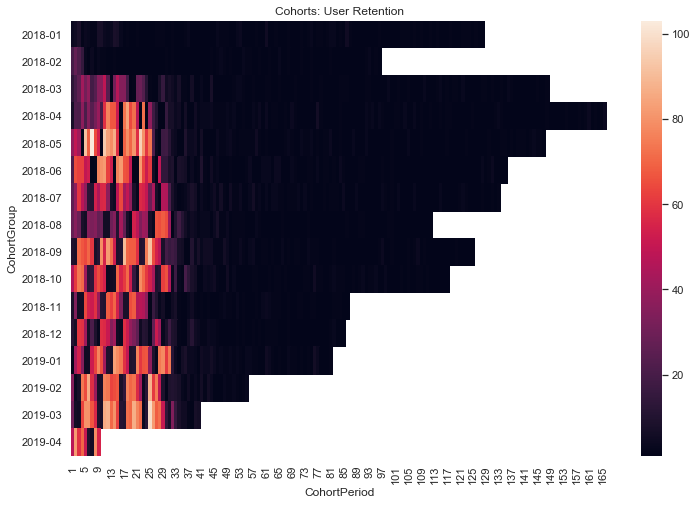

In [31]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=False, fmt='.0');

In [61]:
user_retention.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            157, 158, 159, 160, 161, 162, 163, 164, 165, 166],
           dtype='int64', name='CohortPeriod', length=166)

In [67]:
user_retention_2 = user_retention.loc[user_retention.index < 60]

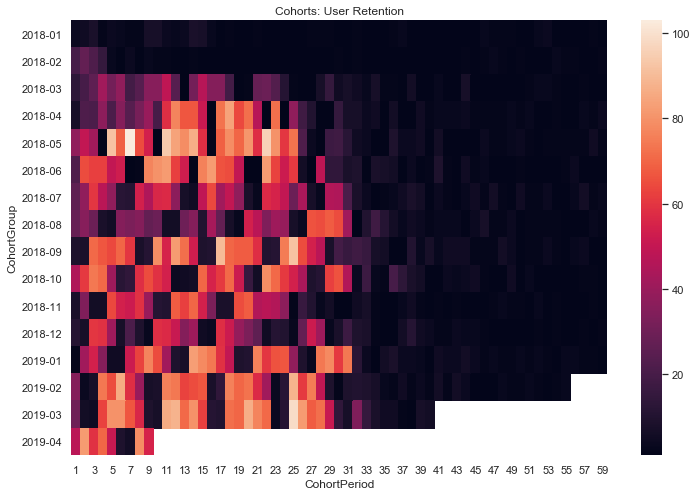

In [69]:
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_2.T, mask=user_retention_2.T.isnull(), annot=False, fmt='.0');